In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop


In [3]:
img = image.load_img("basedata/train/bianco/bianco1.jpg")

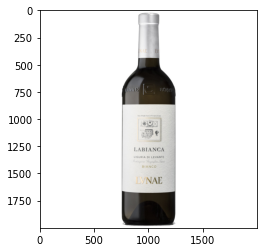

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("basedata/train/bianco/bianco1.jpg").shape

(2000, 2000, 3)

In [6]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset=train.flow_from_directory('basedata/train/',
                                       target_size=(200,200),
                                       batch_size= 3,
                                       class_mode='binary')
validation_dataset=validation.flow_from_directory('basedata/validation/',
                                       target_size=(200,200),
                                       batch_size= 3,
                                       class_mode='binary')

Found 199 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [8]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation= 'relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                      tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])

In [9]:
model.compile(loss= 'binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics = ['accuracy'])

In [10]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch=3,
                     epochs=30,
                     validation_data= validation_dataset)

Epoch 1/30
3/3 [==============================] - 6s 2s/step - loss: 9.8183 - accuracy: 0.3889 - val_loss: 0.8417 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 4s 2s/step - loss: 1.7143 - accuracy: 0.2361 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 3s 2s/step - loss: 0.7013 - accuracy: 0.7232 - val_loss: 0.6871 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 0.6730 - accuracy: 0.5694 - val_loss: 0.6746 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 4s 2s/step - loss: 0.6703 - accuracy: 0.5694 - val_loss: 0.7072 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 4s 2s/step - loss: 0.6149 - accuracy: 0.6111 - val_loss: 0.7416 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 4s 2s/step - loss: 0.7200 - accuracy: 0.5139 - val_loss: 0.6494 - val_accuracy: 0.5000
Epoch 8/30
3/3 [=========================

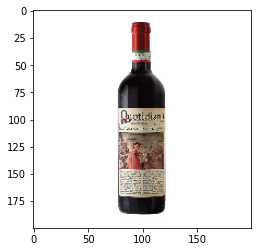

rosso


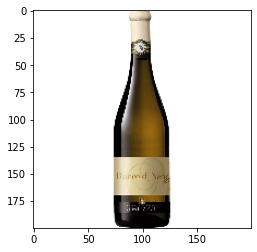

bianco


In [11]:
dir_path='basedata/test'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X= image.img_to_array(img)
    X= np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val = model.predict(images)
    
    if val==0:
        print("bianco")
    else:
        print("rosso")
    
    